# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [321]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### 1. Load the dataset

In [322]:
# Load files into a pandas dataframe
train = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Train.csv')
test = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
#ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/VariableDefinitions.csv')

In [323]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [324]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [325]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



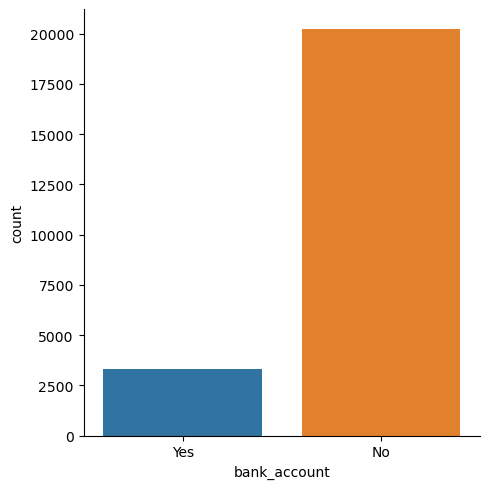

In [326]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [327]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [328]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [329]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

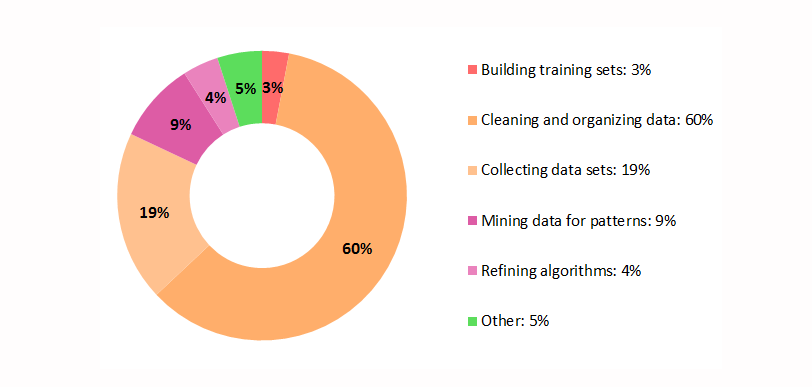

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [336]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
*   Drop uniqueid variable
*   Perform [feature scaling](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9).

The processing function will be used for both train and test independent variables.

In [331]:
train.gender_of_respondent.value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [332]:
from sklearn.preprocessing import MinMaxScaler

def preprocessing_data(data):
    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    # Feature scaling using MinMaxScaler
    scaler = MinMaxScaler()
    float_array_scaled = scaler.fit_transform(float_array)

    # Convert the scaled numerical values back to DataFrame
    data[["household_size", "age_of_respondent", "year"]] = float_array_scaled

    # categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    #data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    data['relationship_with_head'] = data['relationship_with_head'].replace({'Head of Household': 0, 'Spouse': 1, 'Child': 2, 'Parent': 3, 'Other relative': 4, 'Other non-relatives': 5})
    data['marital_status'] = data['marital_status'].replace({'Married/Living together': 0, 'Single/Never Married': 1, 'Widowed': 2, 'Divorced/Seperated': 3, 'Dont know': 4})
    data['education_level'] = data['education_level'].replace({'Primary education': 0, 'No formal education': 1, 'Secondary education': 2, 'Tertiary education': 3, 'Vocational/Specialised training': 4, 'Other/Dont know/RTA': 5})
    data['job_type'] = data['job_type'].replace({'Self employed': 0, 'Informally employed': 1, 'Farming and Fishing': 2, 'Remittance Dependent': 3, 'Other Income': 4, 'Formally employed Private': 5, 'No Income': 6, 'Formally employed Government': 7, 'Government Dependent': 8, 'Dont Know/Refuse to answer': 9})
    data['country'] = data['country'].replace({'Rwanda': 0, 'Tanzania': 1, 'Kenya': 2, 'Uganda': 3})

    # Label Encoder conversion
    data['location_type'] = data['location_type'].replace({'Rural': 0, 'Urban': 1})

    data["cellphone_access"] = data["cellphone_access"].replace({'Yes': 1, 'No': 0})
    data["gender_of_respondent"] = data["gender_of_respondent"].replace({'Male': 1, 'Female': 0})

    # drop uniqueid column
    data = data.drop(["uniqueid"], axis=1)

    return data


Preprocess both train and test dataset.

In [337]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [296]:
# the first train row
print(processed_train[:1])

   country  year  location_type  cellphone_access  household_size  \
0        2   1.0              0                 1             0.1   

   age_of_respondent  gender_of_respondent  relationship_with_head  \
0           0.095238                     0                       1   

   marital_status  education_level  job_type  
0               0                2         0  


Observe the shape of the train data.

In [297]:
# shape of the processed train set
print(processed_train.shape)

(23524, 11)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [244]:
import sklearn.model_selection


In [298]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.2, random_state=42)

In [246]:
print(X_Train[:1])

      country  year  location_type  cellphone_access  household_size  \
3535        2   1.0              0                 1            0.15   

      age_of_respondent  gender_of_respondent  relationship_with_head  \
3535           0.142857                     0                       1   

      marital_status  education_level  job_type  
3535               0                0         1  


In [247]:
print(y_val)

69       1
13395    0
18888    0
4660     0
13090    0
        ..
8131     0
18941    0
13761    0
12202    0
1356     0
Name: bank_account, Length: 4705, dtype: int64


In [248]:
print(len(X_Val))

4705


Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

Let’s check the confusion matrix for XGB model.

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


Let’s observe the sample results from our submission DataFrame.


Save results in the CSV file.


We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************

In [249]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the parameters for the LGBM model
lgbm_params = {'learning_rate': 0.2, 'max_depth': 3, 'min_child_samples': 100, 'num_leaves': 31, 'subsample': 0.8}


# Create and fit the LGBM model
lgbm_model = lgb.LGBMClassifier(**lgbm_params)
lgbm_model.fit(X_Train, y_Train)
y_pred = lgbm_model.predict(X_Val)
print(len(y_pred))
# Calculate the error rate
error_rate = 1 - accuracy_score(y_val, y_pred)
print("Error rate of the LGBM classifier: ", error_rate)


4705
Error rate of the LGBM classifier:  0.11137088204038259


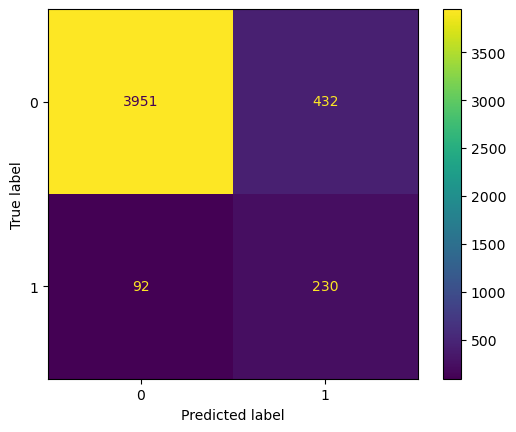

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=lgbm_model
cm = confusion_matrix(y_pred, y_val, labels=clfb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfb.classes_)
disp.plot()
plt.show()

In [251]:
"""from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your data and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.2, random_state=42)
# Create individual models
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Create the voting classifier
voting_model = VotingClassifier(
    estimators=[('knn', knn_model), ('logreg', logreg_model), ('rf', rf_model), ('xgb', xgb_model)],
    voting='hard'  # Voting strategy can be 'hard' or 'soft'
)

# Fit the voting classifier on the training data
voting_model.fit(X_train, y_train)

# Predict on the test data
y_pred = voting_model.predict(X_test)

# Calculate the error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print("Error rate of the ensemble model:", error_rate)
"""

'from sklearn.ensemble import VotingClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\n\n# Load your data and split into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(processed_train, y_train, stratify = y_train, \n                                                  test_size = 0.2, random_state=42)\n# Create individual models\nknn_model = KNeighborsClassifier()\nlogreg_model = LogisticRegression()\nrf_model = RandomForestClassifier()\nxgb_model = XGBClassifier()\n\n# Create the voting classifier\nvoting_model = VotingClassifier(\n    estimators=[(\'knn\', knn_model), (\'logreg\', logreg_model), (\'rf\', rf_model), (\'xgb\', xgb_model)],\n    voting=\'hard\'  # Voting strategy can be \'hard\' or \'soft\'\n)\n\n# F

In [252]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load your data and split into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(processed_train, y_train, stratify = y_train,test_size = 0.2, random_state=42)

# Create individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Create the bagging classifier with the ensemble of models
bagging_model = BaggingClassifier(
    base_estimator=VotingClassifier(
        estimators=[('logreg', logreg_model), ('rf', rf_model), ('xgb', xgb_model)],
        voting='soft'  # Use soft voting strategy
    ),
    n_estimators=10,  # Number of base estimators
    random_state=42
)

# Fit the bagging classifier on the training data
bagging_model.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the bagging ensemble model:", 1-accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

In [299]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [20,31, 63],
    'max_depth': [3, 5],
    'min_child_samples': [100,200,500],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Create LightGBM classifier
lgbm_model = lgb.LGBMClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(lgbm_model, param_grid, scoring='accuracy', cv=3)

# Fit the model on training data
grid_search.fit(X_Train, y_Train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [300]:

# Create a new LGBM classifier with the best parameters
best_lgbm_model = lgb.LGBMClassifier(**best_params)
best_lgbm_model.fit(X_Train, y_Train)

# Make predictions on the validation data
y_pred = best_lgbm_model.predict(X_Val)

# Calculate the error rate
error_rate = 1 - accuracy_score(y_val, y_pred)
print("Error rate of the best LGBM classifier: ", error_rate)


Error rate of the best LGBM classifier:  0.1098831030818278


In [301]:
print(best_params)

{'learning_rate': 0.2, 'max_depth': 3, 'min_child_samples': 500, 'num_leaves': 20}


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_val, y_train, y_val =  train_test_split(processed_train, y_train, stratify = y_train,test_size = 0.15, random_state=42)

# Define the base LightGBM model
lgbm_model = lgb.LGBMClassifier(learning_rate=0.2, max_depth=3, min_child_samples=100, num_leaves=31, subsample=0.8)

# Create the bagging model
bagging_model = BaggingClassifier(base_estimator=lgbm_model, n_estimators=10, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = bagging_model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy of the bagging model:", 1-accuracy)


In [338]:
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_val, y_train, y_val =  train_test_split(processed_train, y_train, stratify = y_train,test_size = 0.2, random_state=42)

# Define the base LightGBM model
lgbm_model = lgb.LGBMClassifier(learning_rate=0.2, max_depth=3, min_child_samples=100, num_leaves=31, subsample=0.8)

# Create the bagging model
bagging_model = BaggingClassifier(base_estimator=lgbm_model, n_estimators=100, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Predict on the validation data
y_pred_prob = bagging_model.predict_proba(X_val)[:, 1]  # Get the probability for the positive class

# Adjust the classification threshold (example: set the threshold to 0.4)
threshold = 0.5
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred_adjusted)
print("Accuracy of the bagging model with adjusted threshold:", 1-accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of the bagging model with adjusted threshold: 0.10967056323060576


In [316]:
# Calculate the error rate
print("Accuracy of the bagging model with adjusted threshold:", 1-accuracy)


Accuracy of the bagging model with adjusted threshold: 0.11009564293304996


In [339]:
# Get the predicted result for the test Data
test.bank_account = bagging_model.predict(processed_test)

/tmp/ipykernel_32/3897162249.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = bagging_model.predict(processed_test)


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Calculate the predicted probabilities for the positive class
y_pred_prob = bagging_model.predict_proba(X_val)[:, 1]

# Define a list of threshold values to evaluate
thresholds = np.arange(0, 1.1, 0.05)

# Initialize variables to store the best threshold and best ROC AUC
best_threshold = 0
best_acc = 0

# Iterate over the threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    y_pred_binary = (y_pred_prob >= threshold).astype(int)
    
    # Calculate the ROC AUC score
    acc = accuracy_score(y_val, y_pred_binary)
    
    # Check if the current threshold gives a better ROC AUC score
    if acc > best_acc:
        best_threshold = threshold
        best_acc = acc

# Print the best threshold and best ROC AUC score
print("Best Threshold:", best_threshold)
print("Best ROC AUC:", 1-best_acc)


In [340]:
# Create submission DataFrame
test1=pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test1["country"],
                           "bank_account": test.bank_account})
#show the five sample
submission.head(9)


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
5,uniqueid_6074 x Kenya,0
6,uniqueid_6075 x Kenya,0
7,uniqueid_6076 x Kenya,1
8,uniqueid_6077 x Kenya,0


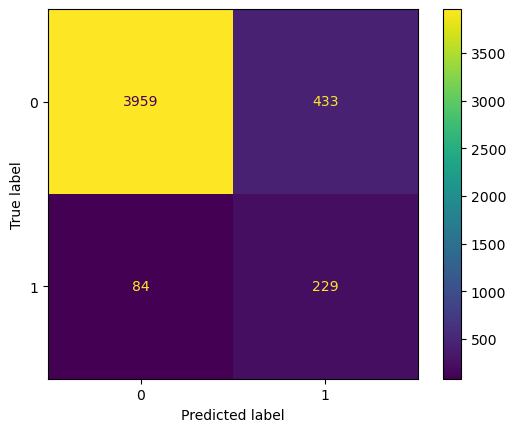

In [341]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=bagging_model
cm = confusion_matrix(y_pred, y_val, labels=clfb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfb.classes_)
disp.plot()
plt.show()

In [343]:
# Create submission csv file csv file
submission.to_csv('submission00.csv', index = False)


# MODEL ENSEMBLING
